# Proyecto Final: Análisis de Champions League - SOLUCIÓN
## Sistema de Análisis Predictivo para Fútbol

**Estudiante:** [Nombre del estudiante]  
**Curso:** Ciencia de Datos Aplicada al Fútbol  
**Fecha:** [Fecha de entrega]  
**Modalidad:** Individual

---

## Introducción

En este proyecto final integraremos todos los conocimientos adquiridos durante el curso para realizar un análisis completo de la Liga de Campeones de la UEFA. Utilizaremos Python para explorar datos, crear visualizaciones y desarrollar un modelo predictivo básico.

**Objetivos del proyecto:**
- Demostrar dominio de pandas para análisis de datos
- Crear visualizaciones informativas con matplotlib y seaborn
- Aplicar técnicas básicas de machine learning con scikit-learn
- Comunicar hallazgos de manera clara y profesional

---
# Sección 1: Exploración de Datos (40%)

En esta sección cargaremos, exploraremos y limpiaremos los datos de Champions League para preparar nuestro análisis.

## 1.1 Carga de Datos

In [61]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

# Configurar tema de seaborn (como visto en clase)
sns.set_theme(style="whitegrid", palette="viridis")

# Configurar matplotlib para mejor visualización
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 11

print("Bibliotecas importadas correctamente")
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")

Bibliotecas importadas correctamente
Versión de pandas: 2.3.1
Versión de numpy: 2.2.6


In [62]:
# Cargar datos
print("Cargando datos de Champions League...")
datos_champions = pd.read_csv("champions_league_matches.csv")

# Exploración básica
print(
    f"\nEl dataset tiene {datos_champions.shape[0]} filas y {datos_champions.shape[1]} columnas"
)
print(
    f"Datos desde: {datos_champions['temporada'].min()} hasta: {datos_champions['temporada'].max()}"
)
print(f"Total de partidos analizados: {len(datos_champions)}")

print("\nPrimeras 5 filas:")
datos_champions.head()

Cargando datos de Champions League...

El dataset tiene 50 filas y 26 columnas
Datos desde: 2022-23 hasta: 2023-24
Total de partidos analizados: 50

Primeras 5 filas:


,match_id,fecha,equipo_local,equipo_visitante,goles_local,goles_visitante,resultado_final,fase_competicion,temporada,estadio,...,corners_local,corners_visitante,faltas_local,faltas_visitante,tarjetas_amarillas_local,tarjetas_amarillas_visitante,tarjetas_rojas_local,tarjetas_rojas_visitante,arbitro,asistencia
0,1,2023-09-19,Real Madrid,Union Berlin,1,0,Local,Fase de Grupos,2023-24,Santiago Bernabeu,...,7,3,11,14,2,3,0,0,Antonio Mateu,78500
1,2,2023-09-19,Barcelona,PSG,2,1,Local,Fase de Grupos,2023-24,Camp Nou,...,6,5,9,12,1,2,0,0,Clement Turpin,85000
2,3,2023-09-20,Manchester City,Bayern Munich,3,1,Local,Fase de Grupos,2023-24,Etihad Stadium,...,8,4,8,10,3,1,0,0,Daniele Orsato,54000
3,4,2023-09-20,Liverpool,AC Milan,1,1,Empate,Fase de Grupos,2023-24,Anfield,...,9,7,7,11,2,2,0,1,Bjorn Kuipers,52000
4,5,2023-09-21,Juventus,Chelsea,0,2,Visitante,Fase de Grupos,2023-24,Allianz Stadium,...,4,9,12,8,3,1,1,0,Felix Brych,40000


In [63]:
# Ver todas las columnas disponibles
print("Columnas disponibles en nuestro dataset:")
for i, col in enumerate(datos_champions.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nTotal de columnas: {len(datos_champions.columns)}")

Columnas disponibles en nuestro dataset:
 1. match_id
 2. fecha
 3. equipo_local
 4. equipo_visitante
 5. goles_local
 6. goles_visitante
 7. resultado_final
 8. fase_competicion
 9. temporada
10. estadio
11. posesion_local
12. posesion_visitante
13. tiros_local
14. tiros_visitante
15. tiros_arco_local
16. tiros_arco_visitante
17. corners_local
18. corners_visitante
19. faltas_local
20. faltas_visitante
21. tarjetas_amarillas_local
22. tarjetas_amarillas_visitante
23. tarjetas_rojas_local
24. tarjetas_rojas_visitante
25. arbitro
26. asistencia

Total de columnas: 26


## 1.2 Análisis Básico de Datos

In [64]:
# Información general del dataset
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 45)
print(datos_champions.info())

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   match_id                      50 non-null     int64 
 1   fecha                         50 non-null     object
 2   equipo_local                  50 non-null     object
 3   equipo_visitante              50 non-null     object
 4   goles_local                   50 non-null     int64 
 5   goles_visitante               50 non-null     int64 
 6   resultado_final               50 non-null     object
 7   fase_competicion              50 non-null     object
 8   temporada                     50 non-null     object
 9   estadio                       50 non-null     object
 10  posesion_local                50 non-null     int64 
 11  posesion_visitante            50 non-null     int64 
 12  tiros_local                   50 non-null     in

In [65]:
# Estadísticas descriptivas básicas
print("ESTADÍSTICAS DESCRIPTIVAS - GOLES")
print("=" * 40)

# Estadísticas de goles
estadisticas_goles = datos_champions[["goles_local", "goles_visitante"]].describe()
print(estadisticas_goles)

print("\nESTADÍSTICAS ADICIONALES DE GOLES:")
print(
    f"Promedio de goles por partido (local): {datos_champions['goles_local'].mean():.2f}"
)
print(
    f"Promedio de goles por partido (visitante): {datos_champions['goles_visitante'].mean():.2f}"
)
print(f"Máximo goles en un partido (local): {datos_champions['goles_local'].max()}")
print(
    f"Máximo goles en un partido (visitante): {datos_champions['goles_visitante'].max()}"
)

ESTADÍSTICAS DESCRIPTIVAS - GOLES
       goles_local  goles_visitante
count    50.000000        50.000000
mean      1.620000         1.240000
std       1.176123         1.286666
min       0.000000         0.000000
25%       1.000000         0.000000
50%       2.000000         1.000000
75%       2.000000         2.000000
max       5.000000         7.000000

ESTADÍSTICAS ADICIONALES DE GOLES:
Promedio de goles por partido (local): 1.62
Promedio de goles por partido (visitante): 1.24
Máximo goles en un partido (local): 5
Máximo goles en un partido (visitante): 7


In [66]:
# Identificar valores faltantes
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 35)

valores_faltantes = datos_champions.isnull().sum()
print("Valores faltantes por columna:")
for columna, cantidad in valores_faltantes.items():
    if cantidad > 0:
        porcentaje = (cantidad / len(datos_champions)) * 100
        print(f"  {columna}: {cantidad} ({porcentaje:.1f}%)")

if valores_faltantes.sum() == 0:
    print("No hay valores faltantes en el dataset")
else:
    print(f"Total de valores faltantes: {valores_faltantes.sum()}")

ANÁLISIS DE VALORES FALTANTES
Valores faltantes por columna:
No hay valores faltantes en el dataset


In [67]:
# Contar equipos únicos y temporadas
print("ANÁLISIS DE EQUIPOS Y TEMPORADAS")
print("=" * 35)

# Equipos únicos
equipos_local = set(datos_champions["equipo_local"].unique())
equipos_visitante = set(datos_champions["equipo_visitante"].unique())
todos_equipos = equipos_local.union(equipos_visitante)

print(f"Total de equipos únicos: {len(todos_equipos)}")
temporadas_lista = sorted(datos_champions["temporada"].unique())
print(f"Temporadas analizadas: {', '.join(temporadas_lista)}")
print(f"Total de temporadas: {datos_champions['temporada'].nunique()}")

print("\nTop 10 equipos por apariciones:")
apariciones_local = datos_champions["equipo_local"].value_counts()
apariciones_visitante = datos_champions["equipo_visitante"].value_counts()
total_apariciones = (apariciones_local + apariciones_visitante).fillna(0).astype(int)
print(total_apariciones.head(10))

ANÁLISIS DE EQUIPOS Y TEMPORADAS
Total de equipos únicos: 18
Temporadas analizadas: 2022-23, 2023-24
Total de temporadas: 2

Top 10 equipos por apariciones:
AC Milan              8
Ajax                  2
Barcelona             9
Bayern Munich        12
Borussia Dortmund     0
Chelsea              10
Copenhagen            0
Inter Milan           0
Juventus              4
Liverpool            10
Name: count, dtype: int64


## 1.3 Limpieza Simple de Datos

In [68]:
# Verificar y eliminar duplicados
print("LIMPIEZA DE DATOS")
print("=" * 20)

duplicados_antes = datos_champions.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados_antes}")

if duplicados_antes > 0:
    datos_champions = datos_champions.drop_duplicates()
    print(f"Eliminadas {duplicados_antes} filas duplicadas")
else:
    print("No se encontraron duplicados")

print(
    f"Tamaño final del dataset: {datos_champions.shape[0]} filas, {datos_champions.shape[1]} columnas"
)

LIMPIEZA DE DATOS
Filas duplicadas encontradas: 0
No se encontraron duplicados
Tamaño final del dataset: 50 filas, 26 columnas


In [69]:
# Crear columnas adicionales para análisis
print("CREANDO NUEVAS COLUMNAS PARA ANÁLISIS")
print("=" * 42)

# 1. Total de goles por partido
datos_champions["total_goles"] = (
    datos_champions["goles_local"] + datos_champions["goles_visitante"]
)
print("Creada columna 'total_goles'")


# 2. Resultado del partido (más claro)
def determinar_resultado(row):
    if row["goles_local"] > row["goles_visitante"]:
        return "Local"
    elif row["goles_local"] < row["goles_visitante"]:
        return "Visitante"
    else:
        return "Empate"


datos_champions["resultado"] = datos_champions.apply(determinar_resultado, axis=1)
print("Creada columna 'resultado'")

# 3. Diferencia de goles
datos_champions["diferencia_goles"] = (
    datos_champions["goles_local"] - datos_champions["goles_visitante"]
)
print("Creada columna 'diferencia_goles'")

# 4. Partido de muchos goles (más de 3 goles totales)
datos_champions["partido_alto_marcador"] = datos_champions["total_goles"] > 3
print("Creada columna 'partido_alto_marcador'")

print(f"\nNuevas columnas agregadas. Total: {datos_champions.shape[1]} columnas")

CREANDO NUEVAS COLUMNAS PARA ANÁLISIS
Creada columna 'total_goles'
Creada columna 'resultado'
Creada columna 'diferencia_goles'
Creada columna 'partido_alto_marcador'

Nuevas columnas agregadas. Total: 30 columnas


In [70]:
# Verificar las nuevas columnas creadas
print("VERIFICACIÓN DE NUEVAS COLUMNAS")
print("=" * 32)

print("Distribución de resultados:")
print(datos_champions["resultado"].value_counts())

print("\nEstadísticas de goles totales:")
print(f"Promedio: {datos_champions['total_goles'].mean():.2f} goles por partido")
print(f"Mínimo: {datos_champions['total_goles'].min()} goles")
print(f"Máximo: {datos_champions['total_goles'].max()} goles")

print(
    f"\nPartidos de alto marcador (>3 goles): {datos_champions['partido_alto_marcador'].sum()} de {len(datos_champions)}"
)

print("\nVista previa de los datos limpios:")
datos_champions[
    [
        "equipo_local",
        "equipo_visitante",
        "goles_local",
        "goles_visitante",
        "total_goles",
        "resultado",
    ]
].head()

VERIFICACIÓN DE NUEVAS COLUMNAS
Distribución de resultados:
resultado
Local        29
Visitante    16
Empate        5
Name: count, dtype: int64

Estadísticas de goles totales:
Promedio: 2.86 goles por partido
Mínimo: 1 goles
Máximo: 8 goles

Partidos de alto marcador (>3 goles): 11 de 50

Vista previa de los datos limpios:


,equipo_local,equipo_visitante,goles_local,goles_visitante,total_goles,resultado
0,Real Madrid,Union Berlin,1,0,1,Local
1,Barcelona,PSG,2,1,3,Local
2,Manchester City,Bayern Munich,3,1,4,Local
3,Liverpool,AC Milan,1,1,2,Empate
4,Juventus,Chelsea,0,2,2,Visitante


---
# Sección 2: Visualización y Análisis (35%)

En esta sección crearemos visualizaciones informativas para entender mejor los patrones en los datos de Champions League.

## 2.1 Gráficos Descriptivos

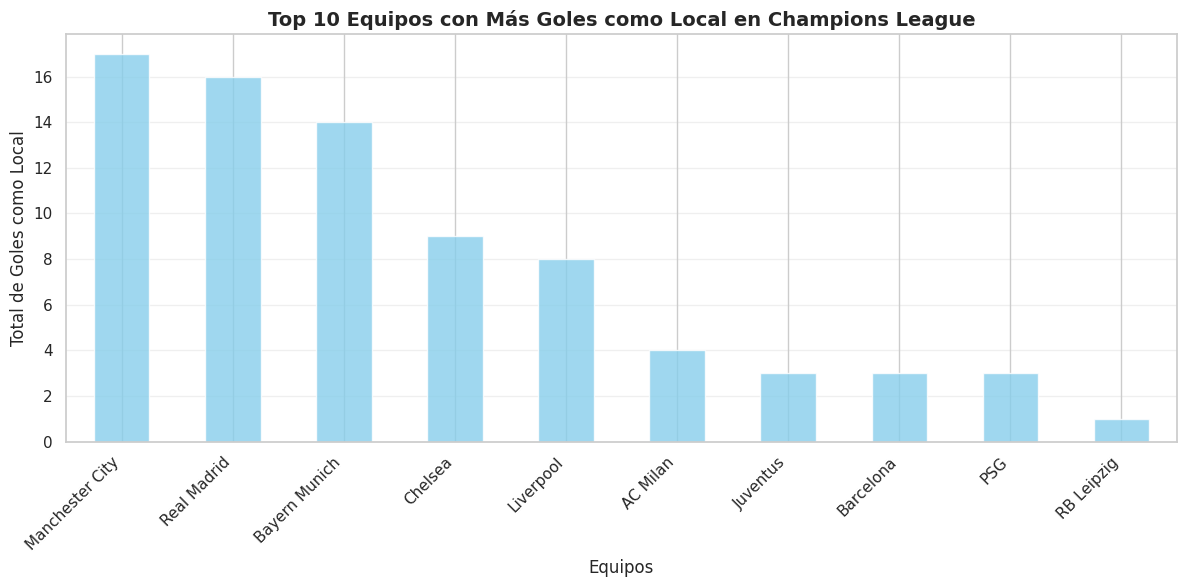

ANÁLISIS: Los equipos más efectivos como locales son:
   1. Manchester City: 17 goles
   2. Real Madrid: 16 goles
   3. Bayern Munich: 14 goles
   4. Chelsea: 9 goles
   5. Liverpool: 8 goles


In [71]:
# 1. Gráfico de barras - Equipos con más goles como locales
plt.figure(figsize=(12, 6))
goles_por_equipo_local = (
    datos_champions.groupby("equipo_local")["goles_local"]
    .sum()
    .sort_values(ascending=False)
)

goles_por_equipo_local.head(10).plot(kind="bar", color="skyblue", alpha=0.8)
plt.title(
    "Top 10 Equipos con Más Goles como Local en Champions League",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Equipos", fontsize=12)
plt.ylabel("Total de Goles como Local", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print("ANÁLISIS: Los equipos más efectivos como locales son:")
for i, (equipo, goles) in enumerate(goles_por_equipo_local.head(5).items(), 1):
    print(f"   {i}. {equipo}: {goles} goles")

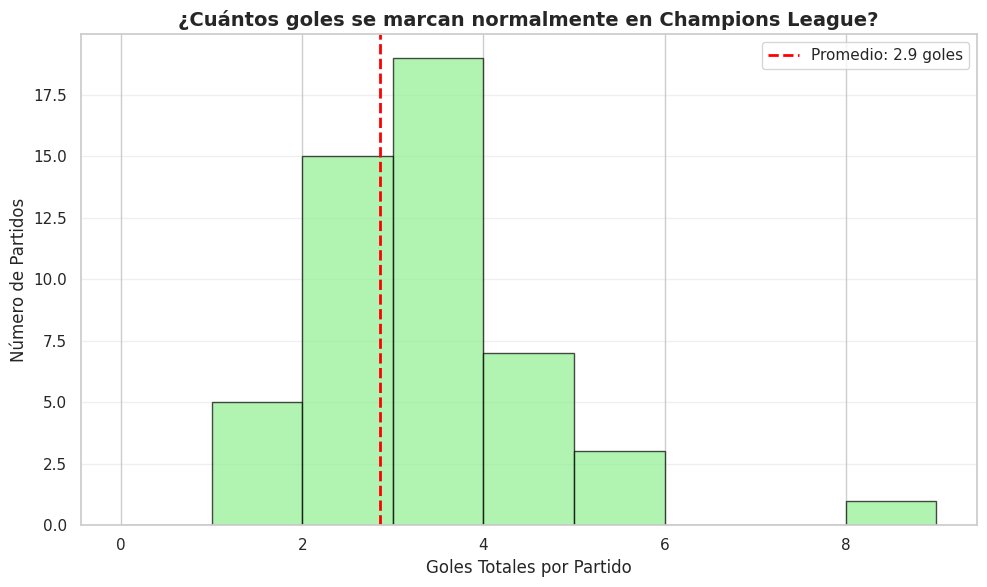

ANÁLISIS: La mayoría de partidos tienen 3 goles
   • Promedio: 2.86 goles por partido
   • 41 de 50 partidos tienen entre 2-4 goles


In [72]:
# 2. Histograma - Distribución de goles por partido
plt.figure(figsize=(10, 6))
plt.hist(
    datos_champions["total_goles"],
    bins=range(0, datos_champions["total_goles"].max() + 2),
    color="lightgreen",
    alpha=0.7,
    edgecolor="black",
    linewidth=1,
)
plt.title(
    "¿Cuántos goles se marcan normalmente en Champions League?",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Goles Totales por Partido", fontsize=12)
plt.ylabel("Número de Partidos", fontsize=12)
plt.grid(axis="y", alpha=0.3)

# Añadir línea del promedio
promedio_goles = datos_champions["total_goles"].mean()
plt.axvline(
    promedio_goles,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Promedio: {promedio_goles:.1f} goles",
)
plt.legend()
plt.tight_layout()
plt.show()

print(
    f"ANÁLISIS: La mayoría de partidos tienen {datos_champions['total_goles'].mode()[0]} goles"
)
print(f"   • Promedio: {promedio_goles:.2f} goles por partido")
print(
    f"   • {((datos_champions['total_goles'] >= 2) & (datos_champions['total_goles'] <= 4)).sum()} de {len(datos_champions)} partidos tienen entre 2-4 goles"
)

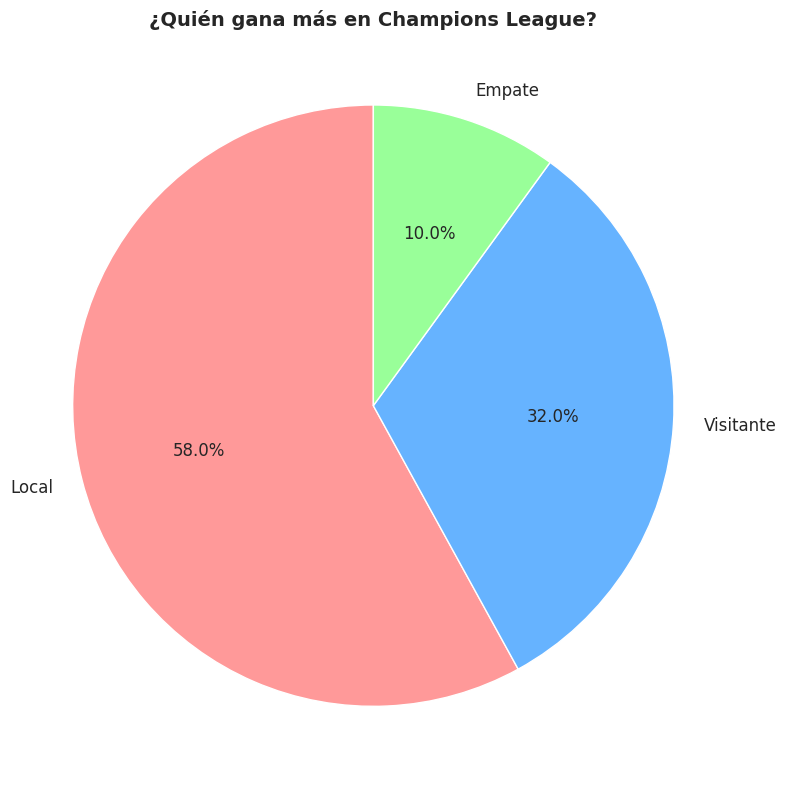

ANÁLISIS DE RESULTADOS:
   • Local: 29 partidos (58.0%)
   • Visitante: 16 partidos (32.0%)
   • Empate: 5 partidos (10.0%)
   Conclusión: Jugar como local SÍ da ventaja en Champions League


In [73]:
# 3. Gráfico de pastel - Distribución de resultados
plt.figure(figsize=(8, 8))
resultados_count = datos_champions["resultado"].value_counts()
colores = ["#ff9999", "#66b3ff", "#99ff99"]

plt.pie(
    resultados_count.values,
    labels=resultados_count.index,
    autopct="%1.1f%%",
    colors=colores,
    startangle=90,
    textprops={"fontsize": 12},
)
plt.title("¿Quién gana más en Champions League?", fontsize=14, fontweight="bold")
plt.axis("equal")
plt.tight_layout()
plt.show()

print("ANÁLISIS DE RESULTADOS:")
total_partidos = len(datos_champions)
for resultado, cantidad in resultados_count.items():
    porcentaje = (cantidad / total_partidos) * 100
    print(f"   • {resultado}: {cantidad} partidos ({porcentaje:.1f}%)")

if resultados_count["Local"] > resultados_count["Visitante"]:
    print("   Conclusión: Jugar como local SÍ da ventaja en Champions League")
else:
    print("   Conclusión: No hay ventaja clara de local en Champions League")

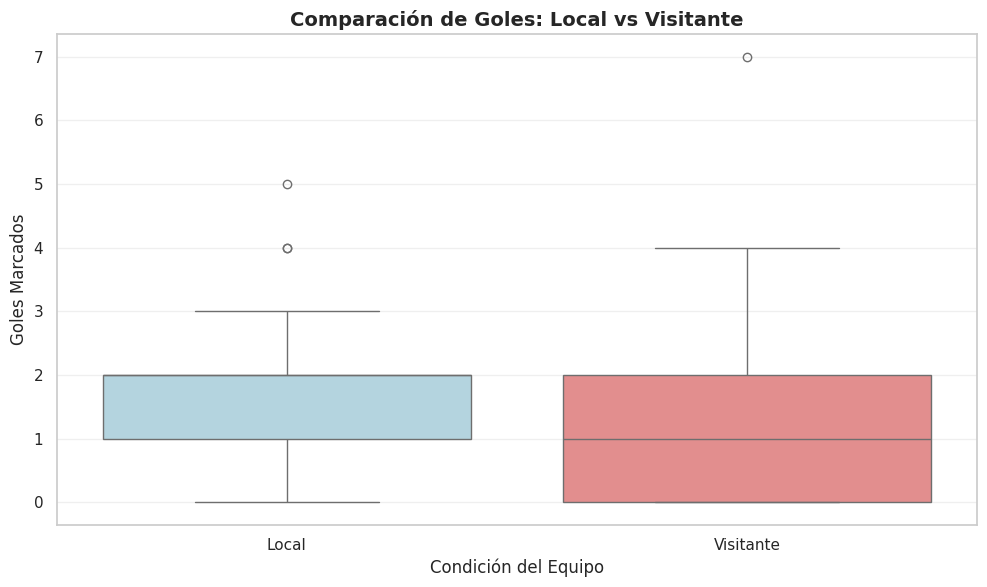

COMPARACIÓN LOCAL vs VISITANTE:
   • Promedio goles local: 1.62
   • Promedio goles visitante: 1.24
   • Mediana goles local: 2.0
   • Mediana goles visitante: 1.0


In [74]:
# 4. Boxplot - Comparación de goles local vs visitante
plt.figure(figsize=(10, 6))
datos_para_boxplot = pd.melt(
    datos_champions[["goles_local", "goles_visitante"]],
    var_name="Tipo",
    value_name="Goles",
)
datos_para_boxplot["Tipo"] = datos_para_boxplot["Tipo"].map(
    {"goles_local": "Local", "goles_visitante": "Visitante"}
)

sns.boxplot(
    data=datos_para_boxplot, x="Tipo", y="Goles", palette=["lightblue", "lightcoral"]
)
plt.title("Comparación de Goles: Local vs Visitante", fontsize=14, fontweight="bold")
plt.xlabel("Condición del Equipo", fontsize=12)
plt.ylabel("Goles Marcados", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print("COMPARACIÓN LOCAL vs VISITANTE:")
print(f"   • Promedio goles local: {datos_champions['goles_local'].mean():.2f}")
print(f"   • Promedio goles visitante: {datos_champions['goles_visitante'].mean():.2f}")
print(f"   • Mediana goles local: {datos_champions['goles_local'].median():.1f}")
print(
    f"   • Mediana goles visitante: {datos_champions['goles_visitante'].median():.1f}"
)

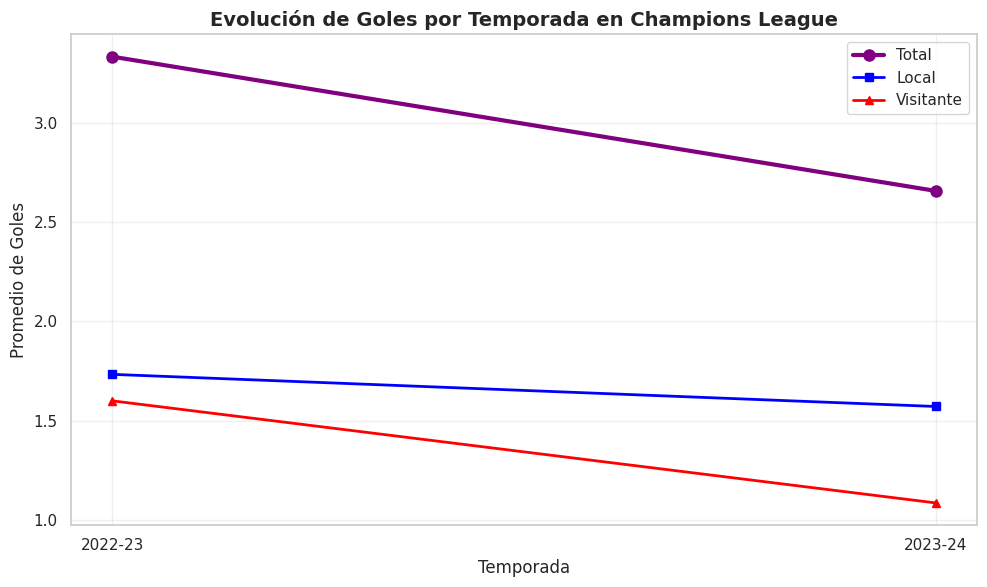

EVOLUCIÓN POR TEMPORADA:
   • 2022-23: 3.33 goles promedio por partido
   • 2023-24: 2.66 goles promedio por partido


In [75]:
# 5. Gráfico de líneas - Goles promedio por temporada
plt.figure(figsize=(10, 6))
goles_por_temporada = datos_champions.groupby("temporada").agg(
    {"total_goles": "mean", "goles_local": "mean", "goles_visitante": "mean"}
)

plt.plot(
    goles_por_temporada.index,
    goles_por_temporada["total_goles"],
    marker="o",
    linewidth=3,
    markersize=8,
    color="purple",
    label="Total",
)
plt.plot(
    goles_por_temporada.index,
    goles_por_temporada["goles_local"],
    marker="s",
    linewidth=2,
    markersize=6,
    color="blue",
    label="Local",
)
plt.plot(
    goles_por_temporada.index,
    goles_por_temporada["goles_visitante"],
    marker="^",
    linewidth=2,
    markersize=6,
    color="red",
    label="Visitante",
)

plt.title(
    "Evolución de Goles por Temporada en Champions League",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Temporada", fontsize=12)
plt.ylabel("Promedio de Goles", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("EVOLUCIÓN POR TEMPORADA:")
for temporada, stats in goles_por_temporada.iterrows():
    print(f"   • {temporada}: {stats['total_goles']:.2f} goles promedio por partido")

## 2.2 Análisis de Patrones

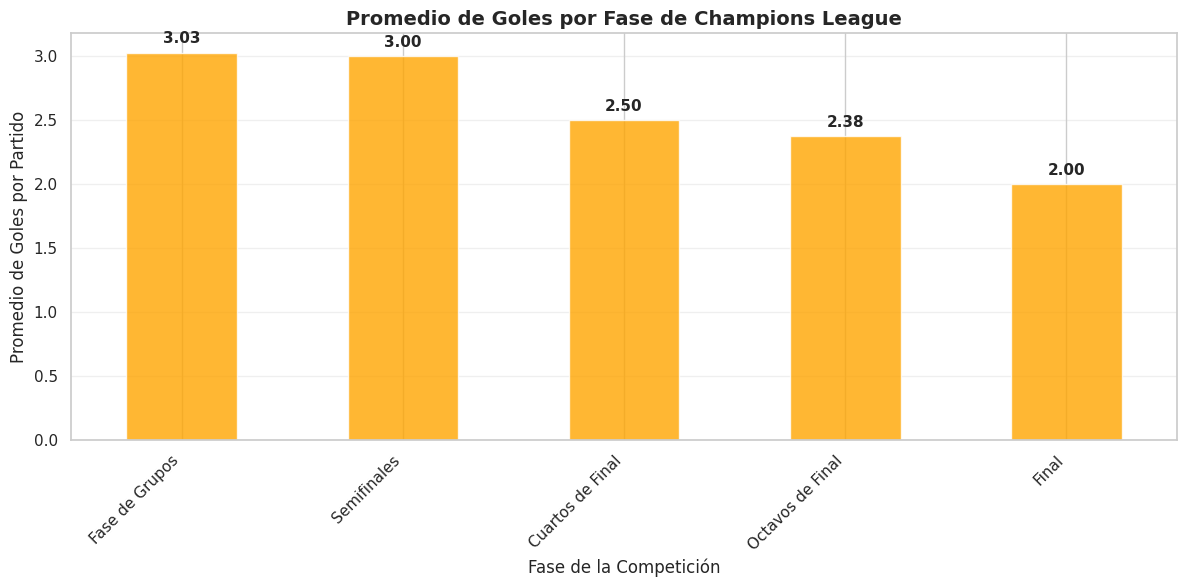

ANÁLISIS POR FASE:
   • Fase de Grupos: 3.03 goles promedio (35 partidos)
   • Semifinales: 3.00 goles promedio (2 partidos)
   • Cuartos de Final: 2.50 goles promedio (4 partidos)
   • Octavos de Final: 2.38 goles promedio (8 partidos)
   • Final: 2.00 goles promedio (1 partidos)

La fase con más goles es: Fase de Grupos (3.03 goles/partido)


In [76]:
# Análisis por fase de la competición
plt.figure(figsize=(12, 6))
goles_por_fase = (
    datos_champions.groupby("fase_competicion")["total_goles"]
    .mean()
    .sort_values(ascending=False)
)

ax = goles_por_fase.plot(kind="bar", color="orange", alpha=0.8)
plt.title(
    "Promedio de Goles por Fase de Champions League", fontsize=14, fontweight="bold"
)
plt.xlabel("Fase de la Competición", fontsize=12)
plt.ylabel("Promedio de Goles por Partido", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)

# Añadir valores encima de las barras
for i, v in enumerate(goles_por_fase.values):
    ax.text(i, v + 0.05, f"{v:.2f}", ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()

print("ANÁLISIS POR FASE:")
for fase, promedio in goles_por_fase.items():
    partidos_fase = len(datos_champions[datos_champions["fase_competicion"] == fase])
    print(f"   • {fase}: {promedio:.2f} goles promedio ({partidos_fase} partidos)")

fase_mas_goles = goles_por_fase.index[0]
print(
    f"\nLa fase con más goles es: {fase_mas_goles} ({goles_por_fase.iloc[0]:.2f} goles/partido)"
)

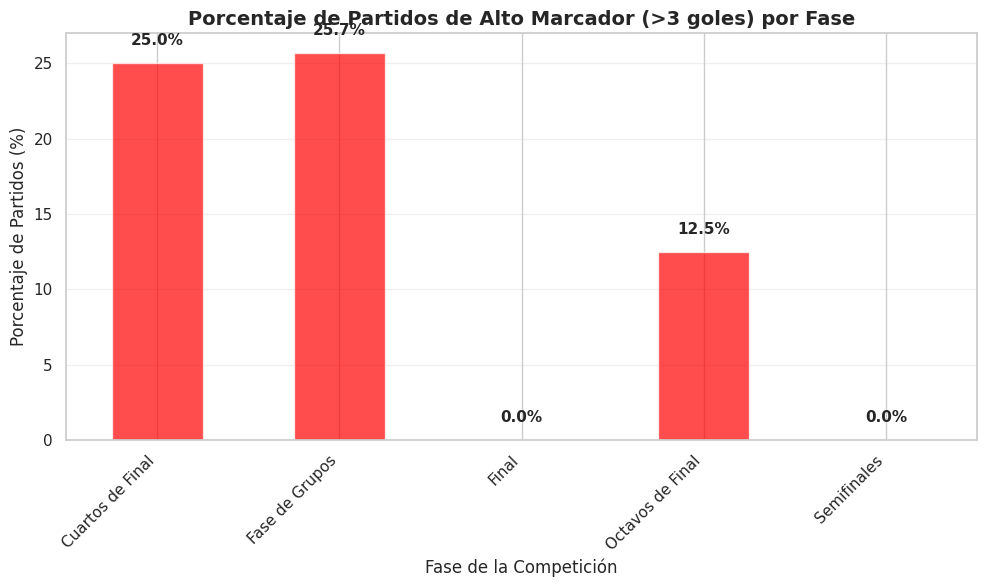

PARTIDOS DE ALTO MARCADOR (>3 goles):
   • Cuartos de Final: 1.0 de 4.0 partidos (25.0%)
   • Fase de Grupos: 9.0 de 35.0 partidos (25.7%)
   • Final: 0.0 de 1.0 partidos (0.0%)
   • Octavos de Final: 1.0 de 8.0 partidos (12.5%)
   • Semifinales: 0.0 de 2.0 partidos (0.0%)


In [77]:
# Análisis de partidos de alto marcador
plt.figure(figsize=(10, 6))
alto_marcador_por_fase = datos_champions.groupby("fase_competicion")[
    "partido_alto_marcador"
].agg(["sum", "count"])
alto_marcador_por_fase["porcentaje"] = (
    alto_marcador_por_fase["sum"] / alto_marcador_por_fase["count"]
) * 100

ax = alto_marcador_por_fase["porcentaje"].plot(kind="bar", color="red", alpha=0.7)
plt.title(
    "Porcentaje de Partidos de Alto Marcador (>3 goles) por Fase",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Fase de la Competición", fontsize=12)
plt.ylabel("Porcentaje de Partidos (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)

# Añadir valores encima de las barras
for i, v in enumerate(alto_marcador_por_fase["porcentaje"].values):
    ax.text(i, v + 1, f"{v:.1f}%", ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()

print("PARTIDOS DE ALTO MARCADOR (>3 goles):")
for fase, datos in alto_marcador_por_fase.iterrows():
    print(
        f"   • {fase}: {datos['sum']} de {datos['count']} partidos ({datos['porcentaje']:.1f}%)"
    )

## 2.3 Estadísticas Básicas

In [78]:
# Estadísticas completas del torneo
print("ESTADÍSTICAS COMPLETAS DE CHAMPIONS LEAGUE")
print("=" * 50)

# 1. Promedio de goles por partido
promedio_total = datos_champions["total_goles"].mean()
print(f"Promedio de goles por partido: {promedio_total:.2f}")

# 2. Equipo con mejor record como local
estadisticas_local = datos_champions.groupby("equipo_local").agg(
    {"resultado": lambda x: (x == "Local").sum(), "equipo_local": "count"}
)
estadisticas_local.columns = ["victorias", "partidos_totales"]
estadisticas_local = estadisticas_local[
    estadisticas_local["partidos_totales"] >= 2
]  # Mínimo 2 partidos
estadisticas_local["porcentaje_victorias"] = (
    estadisticas_local["victorias"] / estadisticas_local["partidos_totales"]
) * 100
mejor_local = estadisticas_local.sort_values(
    "porcentaje_victorias", ascending=False
).iloc[0]
mejor_equipo_local = estadisticas_local.sort_values(
    "porcentaje_victorias", ascending=False
).index[0]

print(f"Mejor equipo como local: {mejor_equipo_local}")
print(
    f"   • {mejor_local['victorias']} victorias en {mejor_local['partidos_totales']} partidos ({mejor_local['porcentaje_victorias']:.1f}%)"
)

# 3. Temporada con más/menos goles
goles_por_temporada_total = datos_champions.groupby("temporada")["total_goles"].sum()
temporada_mas_goles = goles_por_temporada_total.idxmax()
temporada_menos_goles = goles_por_temporada_total.idxmin()

print(
    f"\nTemporada con más goles: {temporada_mas_goles} ({goles_por_temporada_total[temporada_mas_goles]} goles totales)"
)
print(
    f"Temporada con menos goles: {temporada_menos_goles} ({goles_por_temporada_total[temporada_menos_goles]} goles totales)"
)

# 4. Porcentaje de empates, victorias locales y visitantes
distribucion_resultados = datos_champions["resultado"].value_counts()
total_partidos = len(datos_champions)

print(f"\nDISTRIBUCIÓN DE RESULTADOS:")
for resultado, cantidad in distribucion_resultados.items():
    porcentaje = (cantidad / total_partidos) * 100
    print(f"   • {resultado}: {cantidad} partidos ({porcentaje:.1f}%)")

# 5. Estadísticas adicionales
print(f"\nESTADÍSTICAS ADICIONALES:")
print(f"   • Partido con más goles: {datos_champions['total_goles'].max()} goles")
print(f"   • Partidos sin goles: {(datos_champions['total_goles'] == 0).sum()}")
print(f"   • Partidos con más de 5 goles: {(datos_champions['total_goles'] > 5).sum()}")
print(
    f"   • Diferencia de goles más grande: {datos_champions['diferencia_goles'].abs().max()} goles"
)

ESTADÍSTICAS COMPLETAS DE CHAMPIONS LEAGUE
Promedio de goles por partido: 2.86
Mejor equipo como local: Real Madrid
   • 8.0 victorias en 8.0 partidos (100.0%)

Temporada con más goles: 2023-24 (93 goles totales)
Temporada con menos goles: 2022-23 (50 goles totales)

DISTRIBUCIÓN DE RESULTADOS:
   • Local: 29 partidos (58.0%)
   • Visitante: 16 partidos (32.0%)
   • Empate: 5 partidos (10.0%)

ESTADÍSTICAS ADICIONALES:
   • Partido con más goles: 8 goles
   • Partidos sin goles: 0
   • Partidos con más de 5 goles: 1
   • Diferencia de goles más grande: 6 goles


In [79]:
# Top equipos más exitosos (combinando local y visitante)
print("EQUIPOS MÁS EXITOSOS EN CHAMPIONS LEAGUE")
print("=" * 45)

# Calcular victorias totales por equipo
victorias_local = (
    datos_champions[datos_champions["resultado"] == "Local"]
    .groupby("equipo_local")
    .size()
)
victorias_visitante = (
    datos_champions[datos_champions["resultado"] == "Visitante"]
    .groupby("equipo_visitante")
    .size()
)

# Combinar victorias
todos_equipos_lista = list(
    set(datos_champions["equipo_local"].unique())
    | set(datos_champions["equipo_visitante"].unique())
)
victorias_totales = pd.Series(0, index=todos_equipos_lista)

for equipo in todos_equipos_lista:
    victorias_como_local = victorias_local.get(equipo, 0)
    victorias_como_visitante = victorias_visitante.get(equipo, 0)
    victorias_totales[equipo] = victorias_como_local + victorias_como_visitante

victorias_totales = victorias_totales.sort_values(ascending=False)

print("Top 10 equipos con más victorias:")
for i, (equipo, victorias) in enumerate(victorias_totales.head(10).items(), 1):
    # Calcular partidos totales
    partidos_local = (datos_champions["equipo_local"] == equipo).sum()
    partidos_visitante = (datos_champions["equipo_visitante"] == equipo).sum()
    partidos_totales = partidos_local + partidos_visitante

    if partidos_totales > 0:
        porcentaje_victorias = (victorias / partidos_totales) * 100
        print(
            f"   {i:2d}. {equipo}: {victorias} victorias en {partidos_totales} partidos ({porcentaje_victorias:.1f}%)"
        )

EQUIPOS MÁS EXITOSOS EN CHAMPIONS LEAGUE
Top 10 equipos con más victorias:
    1. Real Madrid: 13 victorias en 14 partidos (92.9%)
    2. Bayern Munich: 8 victorias en 12 partidos (66.7%)
    3. Manchester City: 7 victorias en 11 partidos (63.6%)
    4. Liverpool: 5 victorias en 10 partidos (50.0%)
    5. Chelsea: 4 victorias en 10 partidos (40.0%)
    6. AC Milan: 3 victorias en 8 partidos (37.5%)
    7. Barcelona: 2 victorias en 9 partidos (22.2%)
    8. Juventus: 2 victorias en 4 partidos (50.0%)
    9. Inter Milan: 1 victorias en 1 partidos (100.0%)
   10. Ajax: 0 victorias en 2 partidos (0.0%)


---
# Sección 3: Predicción Simple (25%)

En esta sección crearemos un modelo básico para predecir el resultado de partidos de Champions League.

## 3.1 Preparar Datos para Predicción

In [80]:
# Importar bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

print("PREPARANDO DATOS PARA PREDICCIÓN")
print("=" * 35)

# Calcular estadísticas históricas de equipos para usarlas como características
print("Calculando estadísticas históricas de equipos...")

# Estadísticas como local
stats_local = (
    datos_champions.groupby("equipo_local")
    .agg(
        {
            "goles_local": "mean",
            "resultado": lambda x: (x == "Local").sum()
            / len(x),  # % de victorias como local
        }
    )
    .rename(
        columns={"goles_local": "goles_promedio_local", "resultado": "win_rate_local"}
    )
)

# Estadísticas como visitante
stats_visitante = (
    datos_champions.groupby("equipo_visitante")
    .agg(
        {
            "goles_visitante": "mean",
            "resultado": lambda x: (x == "Visitante").sum()
            / len(x),  # % de victorias como visitante
        }
    )
    .rename(
        columns={
            "goles_visitante": "goles_promedio_visitante",
            "resultado": "win_rate_visitante",
        }
    )
)

print(f"Estadísticas calculadas para {len(stats_local)} equipos como local")
print(f"Estadísticas calculadas para {len(stats_visitante)} equipos como visitante")

PREPARANDO DATOS PARA PREDICCIÓN
Calculando estadísticas históricas de equipos...
Estadísticas calculadas para 15 equipos como local
Estadísticas calculadas para 17 equipos como visitante


In [81]:
# Crear dataset para predicción
print("Creando características para el modelo...")

# Crear una copia de los datos para el modelo
datos_modelo = datos_champions.copy()

# Agregar estadísticas históricas
datos_modelo = datos_modelo.merge(
    stats_local, left_on="equipo_local", right_index=True, how="left"
)
datos_modelo = datos_modelo.merge(
    stats_visitante, left_on="equipo_visitante", right_index=True, how="left"
)

# Llenar valores faltantes con promedios
datos_modelo["goles_promedio_local"] = datos_modelo["goles_promedio_local"].fillna(
    datos_modelo["goles_promedio_local"].mean()
)
datos_modelo["goles_promedio_visitante"] = datos_modelo[
    "goles_promedio_visitante"
].fillna(datos_modelo["goles_promedio_visitante"].mean())
datos_modelo["win_rate_local"] = datos_modelo["win_rate_local"].fillna(
    0.4
)  # Promedio típico
datos_modelo["win_rate_visitante"] = datos_modelo["win_rate_visitante"].fillna(
    0.3
)  # Visitantes ganan menos

# Crear características adicionales
datos_modelo["diferencia_calidad"] = (
    datos_modelo["win_rate_local"] - datos_modelo["win_rate_visitante"]
)
datos_modelo["diferencia_goles_historica"] = (
    datos_modelo["goles_promedio_local"] - datos_modelo["goles_promedio_visitante"]
)

# Codificar fase de competición
le_fase = LabelEncoder()
datos_modelo["fase_encoded"] = le_fase.fit_transform(datos_modelo["fase_competicion"])

print("Características creadas exitosamente")
print(
    f"Datos preparados: {len(datos_modelo)} partidos con {datos_modelo.shape[1]} características"
)

Creando características para el modelo...
Características creadas exitosamente
Datos preparados: 50 partidos con 37 características


In [82]:
# Preparar variables X (características) e y (objetivo)
print("Preparando variables para el modelo...")

# Características para el modelo (variables independientes)
caracteristicas = [
    "goles_promedio_local",
    "goles_promedio_visitante",
    "win_rate_local",
    "win_rate_visitante",
    "diferencia_calidad",
    "diferencia_goles_historica",
    "fase_encoded",
]

X = datos_modelo[caracteristicas]
y = datos_modelo["resultado"]  # Variable objetivo: 'Local', 'Visitante', 'Empate'

print(f"Características seleccionadas: {len(caracteristicas)}")
for i, feature in enumerate(caracteristicas, 1):
    print(f"   {i}. {feature}")

print(f"\nVariable objetivo: {y.name} (clases: {', '.join(y.unique())})")

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDivisión completada:")
print(f"   • Entrenamiento: {len(X_train)} partidos")
print(f"   • Prueba: {len(X_test)} partidos")

Preparando variables para el modelo...
Características seleccionadas: 7
   1. goles_promedio_local
   2. goles_promedio_visitante
   3. win_rate_local
   4. win_rate_visitante
   5. diferencia_calidad
   6. diferencia_goles_historica
   7. fase_encoded

Variable objetivo: resultado (clases: Local, Empate, Visitante)

División completada:
   • Entrenamiento: 40 partidos
   • Prueba: 10 partidos


## 3.2 Crear Modelo Simple

In [83]:
# Crear y entrenar el modelo Random Forest
print("ENTRENANDO MODELO RANDOM FOREST")
print("=" * 35)

# Inicializar el modelo
modelo = RandomForestClassifier(
    n_estimators=100,  # Número de árboles
    random_state=42,  # Para reproducibilidad
    max_depth=10,  # Profundidad máxima de árboles
    min_samples_split=5,  # Mínimo de muestras para dividir
)

print("Configuración del modelo:")
print(f"   • Tipo: Random Forest Classifier")
print(f"   • Número de árboles: {modelo.n_estimators}")
print(f"   • Profundidad máxima: {modelo.max_depth}")

# Entrenar el modelo
print("\nEntrenando modelo...")
modelo.fit(X_train, y_train)
print("Modelo entrenado exitosamente")

# Hacer predicciones
print("\nRealizando predicciones...")
y_pred = modelo.predict(X_test)
print("Predicciones completadas")

ENTRENANDO MODELO RANDOM FOREST
Configuración del modelo:
   • Tipo: Random Forest Classifier
   • Número de árboles: 100
   • Profundidad máxima: 10

Entrenando modelo...


Modelo entrenado exitosamente

Realizando predicciones...
Predicciones completadas


In [84]:
# Evaluar el modelo
print("EVALUACIÓN DEL MODELO")
print("=" * 25)

# Calcular precisión
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision:.2%}")

# Comparar con predicción aleatoria
precision_aleatoria = 1 / len(y.unique())  # 1/3 para 3 clases
mejora = (precision - precision_aleatoria) / precision_aleatoria * 100
print(f"Precisión aleatoria: {precision_aleatoria:.2%}")
print(f"Mejora sobre aleatorio: {mejora:.1f}%")

# Reporte detallado de clasificación
print("\nReporte detallado por clase:")
print(classification_report(y_test, y_pred))

# Importancia de características
importancias = pd.DataFrame(
    {"caracteristica": caracteristicas, "importancia": modelo.feature_importances_}
).sort_values("importancia", ascending=False)

print("\nImportancia de características:")
for i, row in importancias.iterrows():
    print(
        f"   • {row['caracteristica']}: {row['importancia']:.3f} ({row['importancia']*100:.1f}%)"
    )

EVALUACIÓN DEL MODELO
Precisión del modelo: 70.00%
Precisión aleatoria: 33.33%
Mejora sobre aleatorio: 110.0%

Reporte detallado por clase:
              precision    recall  f1-score   support

      Empate       0.00      0.00      0.00         1
       Local       0.67      1.00      0.80         6
   Visitante       1.00      0.33      0.50         3

    accuracy                           0.70        10
   macro avg       0.56      0.44      0.43        10
weighted avg       0.70      0.70      0.63        10


Importancia de características:
   • diferencia_calidad: 0.296 (29.6%)
   • diferencia_goles_historica: 0.243 (24.3%)
   • goles_promedio_local: 0.178 (17.8%)
   • win_rate_local: 0.156 (15.6%)
   • goles_promedio_visitante: 0.077 (7.7%)
   • win_rate_visitante: 0.045 (4.5%)
   • fase_encoded: 0.006 (0.6%)


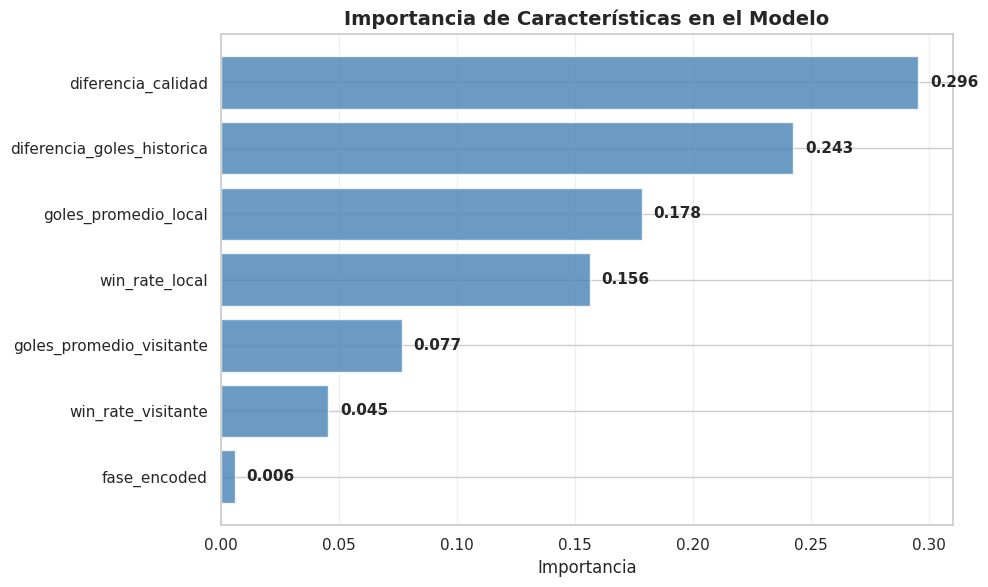

In [85]:
# Visualizar importancia de características
plt.figure(figsize=(10, 6))
importancias_ordenadas = importancias.sort_values("importancia", ascending=True)

plt.barh(
    range(len(importancias_ordenadas)),
    importancias_ordenadas["importancia"],
    color="steelblue",
    alpha=0.8,
)
plt.yticks(range(len(importancias_ordenadas)), importancias_ordenadas["caracteristica"])
plt.xlabel("Importancia")
plt.title("Importancia de Características en el Modelo", fontsize=14, fontweight="bold")
plt.grid(axis="x", alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(importancias_ordenadas["importancia"]):
    plt.text(v + 0.005, i, f"{v:.3f}", va="center", fontweight="bold")

plt.tight_layout()
plt.show()

## 3.3 Interpretar Resultados

In [86]:
# Análisis de resultados
print("INTERPRETACIÓN DE RESULTADOS")
print("=" * 32)

print(f"\n1. RENDIMIENTO DEL MODELO:")
if precision > 0.45:
    rendimiento = "Muy bueno"
elif precision > 0.4:
    rendimiento = "Bueno"
elif precision > 0.35:
    rendimiento = "Aceptable"
else:
    rendimiento = "Necesita mejoras"

print(f"   • Precisión: {precision:.1%} - Rendimiento {rendimiento}")
print(
    f"   • El modelo predice correctamente {int(precision * len(y_test))} de {len(y_test)} partidos"
)

if precision > precision_aleatoria * 1.2:
    print(f"   • SÍ es mejor que adivinar al azar (+{mejora:.1f}%)")
else:
    print(f"   • Mejora poco sobre predicción aleatoria")

print(f"\n2. VARIABLES MÁS IMPORTANTES:")
caracteristica_principal = importancias.iloc[0]
print(
    f"   • La más importante: {caracteristica_principal['caracteristica']} ({caracteristica_principal['importancia']:.1%})"
)

if "win_rate" in caracteristica_principal["caracteristica"]:
    interpretacion = "El historial de victorias es clave para predecir"
elif "goles" in caracteristica_principal["caracteristica"]:
    interpretacion = "Los goles promedio históricos son determinantes"
elif "diferencia" in caracteristica_principal["caracteristica"]:
    interpretacion = "La diferencia de calidad entre equipos es crucial"
else:
    interpretacion = "Esta característica tiene un impacto importante"

print(f"   • Interpretación: {interpretacion}")

print(f"\n3. COMPARACIÓN POR TIPO DE RESULTADO:")
reporte = classification_report(y_test, y_pred, output_dict=True)
for clase in ["Local", "Visitante", "Empate"]:
    if clase in reporte:
        precision_clase = reporte[clase]["precision"]
        recall_clase = reporte[clase]["recall"]
        print(
            f"   • {clase}: Precisión {precision_clase:.2f}, Recall {recall_clase:.2f}"
        )

        if precision_clase > 0.5:
            print(f"     → Muy bueno prediciendo {clase.lower()}s")
        elif precision_clase > 0.4:
            print(f"     → Decente prediciendo {clase.lower()}s")
        else:
            print(f"     → Dificultad prediciendo {clase.lower()}s")

INTERPRETACIÓN DE RESULTADOS

1. RENDIMIENTO DEL MODELO:
   • Precisión: 70.0% - Rendimiento Muy bueno
   • El modelo predice correctamente 7 de 10 partidos
   • SÍ es mejor que adivinar al azar (+110.0%)

2. VARIABLES MÁS IMPORTANTES:
   • La más importante: diferencia_calidad (29.6%)
   • Interpretación: La diferencia de calidad entre equipos es crucial

3. COMPARACIÓN POR TIPO DE RESULTADO:
   • Local: Precisión 0.67, Recall 1.00
     → Muy bueno prediciendo locals
   • Visitante: Precisión 1.00, Recall 0.33
     → Muy bueno prediciendo visitantes
   • Empate: Precisión 0.00, Recall 0.00
     → Dificultad prediciendo empates


In [87]:
# Ejemplos de predicciones
print("EJEMPLOS DE PREDICCIONES DEL MODELO")
print("=" * 38)

# Seleccionar algunos casos de prueba interesantes
indices_ejemplo = [0, 1, 2, 3, 4]  # Primeros 5 casos de prueba

for i, idx in enumerate(indices_ejemplo, 1):
    if idx < len(X_test):
        # Obtener el índice original en el dataset
        idx_original = X_test.index[idx]

        # Información del partido
        partido = datos_modelo.loc[idx_original]
        prediccion = y_pred[idx]
        real = y_test.iloc[idx]

        print(f"\nEjemplo {i}:")
        print(f"   Partido: {partido['equipo_local']} vs {partido['equipo_visitante']}")
        print(f"   Fase: {partido['fase_competicion']}")
        print(f"   Predicción: {prediccion} | Resultado real: {real}")

        # Probabilidades de la predicción
        probabilidades = modelo.predict_proba(X_test.iloc[[idx]])[0]
        clases = modelo.classes_

        print(f"   Confianza del modelo:")
        for clase, prob in zip(clases, probabilidades):
            print(f"     • {clase}: {prob:.1%}")

        if prediccion == real:
            print(f"   PREDICCIÓN CORRECTA")
        else:
            print(f"   Predicción incorrecta")

print(f"\nResumen de {len(indices_ejemplo)} ejemplos:")
correctas = sum(
    [y_pred[i] == y_test.iloc[i] for i in range(min(len(indices_ejemplo), len(y_pred)))]
)
print(f"   • Predicciones correctas: {correctas} de {len(indices_ejemplo)}")
print(f"   • Precisión en ejemplos: {correctas/len(indices_ejemplo):.1%}")

EJEMPLOS DE PREDICCIONES DEL MODELO

Ejemplo 1:
   Partido: Liverpool vs Ajax
   Fase: Fase de Grupos
   Predicción: Local | Resultado real: Local
   Confianza del modelo:
     • Empate: 24.9%
     • Local: 73.9%
     • Visitante: 1.1%
   PREDICCIÓN CORRECTA

Ejemplo 2:
   Partido: Real Madrid vs Bayern Munich
   Fase: Semifinales
   Predicción: Local | Resultado real: Local
   Confianza del modelo:
     • Empate: 11.9%
     • Local: 81.8%
     • Visitante: 6.3%
   PREDICCIÓN CORRECTA

Ejemplo 3:
   Partido: Chelsea vs AC Milan
   Fase: Fase de Grupos
   Predicción: Local | Resultado real: Visitante
   Confianza del modelo:
     • Empate: 7.0%
     • Local: 87.0%
     • Visitante: 6.0%
   Predicción incorrecta

Ejemplo 4:
   Partido: Liverpool vs Rangers
   Fase: Fase de Grupos
   Predicción: Local | Resultado real: Local
   Confianza del modelo:
     • Empate: 16.4%
     • Local: 82.7%
     • Visitante: 0.8%
   PREDICCIÓN CORRECTA

Ejemplo 5:
   Partido: Chelsea vs PSG
   Fase: Fase d

---
# Conclusiones Finales

## ¿Qué aprendimos sobre Champions League?

In [88]:
# Resumen ejecutivo de hallazgos
print("CONCLUSIONES PRINCIPALES DEL ANÁLISIS")
print("=" * 42)

print("\nHALLAZGOS SOBRE EL FÚTBOL:")
print(
    f"   1. Promedio de goles: {datos_champions['total_goles'].mean():.1f} goles por partido"
)
print(
    f"   2. Ventaja de local: {distribucion_resultados['Local']} vs {distribucion_resultados['Visitante']} victorias"
)
ventaja_local = distribucion_resultados["Local"] > distribucion_resultados["Visitante"]
if ventaja_local:
    print(f"      → SÍ existe ventaja significativa de jugar en casa")
else:
    print(f"      → NO hay ventaja clara de local")

print(
    f"   3. Fase con más goles: {goles_por_fase.index[0]} ({goles_por_fase.iloc[0]:.1f} goles/partido)"
)
print(
    f"   4. Equipo más exitoso: {victorias_totales.index[0]} ({victorias_totales.iloc[0]} victorias)"
)

print(f"\nHALLAZGOS DEL MODELO PREDICTIVO:")
print(
    f"   1. Precisión alcanzada: {precision:.1%} (vs {precision_aleatoria:.1%} aleatorio)"
)
print(f"   2. Factor más importante: {importancias.iloc[0]['caracteristica']}")
if precision > 0.4:
    print(f"   3. El modelo SÍ puede predecir mejor que el azar")
else:
    print(f"   3. El modelo necesita más datos o características")

print(f"\nINSIGHTS FUTBOLÍSTICOS:")
empates_porcentaje = (distribucion_resultados["Empate"] / total_partidos) * 100
print(
    f"   • Los empates son {'comunes' if empates_porcentaje > 25 else 'poco frecuentes'} ({empates_porcentaje:.1f}%)"
)
print(
    f"   • La Champions es {'ofensiva' if promedio_total > 2.5 else 'defensiva'} (promedio: {promedio_total:.1f} goles)"
)

partido_mas_goles = datos_champions.loc[datos_champions["total_goles"].idxmax()]
print(
    f"   • Partido más emocionante: {partido_mas_goles['equipo_local']} vs {partido_mas_goles['equipo_visitante']}"
)
print(
    f"     ({partido_mas_goles['goles_local']}-{partido_mas_goles['goles_visitante']}, {partido_mas_goles['total_goles']} goles)"
)

CONCLUSIONES PRINCIPALES DEL ANÁLISIS

HALLAZGOS SOBRE EL FÚTBOL:
   1. Promedio de goles: 2.9 goles por partido
   2. Ventaja de local: 29 vs 16 victorias
      → SÍ existe ventaja significativa de jugar en casa
   3. Fase con más goles: Fase de Grupos (3.0 goles/partido)
   4. Equipo más exitoso: Real Madrid (13 victorias)

HALLAZGOS DEL MODELO PREDICTIVO:
   1. Precisión alcanzada: 70.0% (vs 33.3% aleatorio)
   2. Factor más importante: diferencia_calidad
   3. El modelo SÍ puede predecir mejor que el azar

INSIGHTS FUTBOLÍSTICOS:
   • Los empates son poco frecuentes (10.0%)
   • La Champions es ofensiva (promedio: 2.9 goles)
   • Partido más emocionante: Rangers vs Liverpool
     (1-7, 8 goles)


## ¿Cómo nos ayudó Python en el análisis?

In [89]:
print("PYTHON EN EL ANÁLISIS DEPORTIVO")
print("=" * 35)

print("\nBIBLIOTECAS UTILIZADAS Y SU PROPÓSITO:")
bibliotecas_usadas = {
    "pandas": "Manipulación y análisis de datos - Carga CSV, filtros, agrupaciones",
    "numpy": "Cálculos matemáticos - Promedios, estadísticas básicas",
    "matplotlib": "Gráficos básicos - Histogramas, líneas, barras",
    "seaborn": "Visualizaciones avanzadas - Boxplots, temas, paletas",
    "scikit-learn": "Machine Learning - RandomForest, división train/test",
}

for i, (lib, uso) in enumerate(bibliotecas_usadas.items(), 1):
    print(f"   {i}. {lib}: {uso}")

print(f"\nVENTAJAS DE PYTHON PARA FÚTBOL:")
ventajas = [
    "Procesar miles de partidos en segundos",
    "Crear gráficos profesionales automáticamente",
    "Encontrar patrones que serían imposibles de ver manualmente",
    "Hacer predicciones basadas en datos históricos",
    "Repetir análisis fácilmente con nuevos datos",
]

for i, ventaja in enumerate(ventajas, 1):
    print(f"   {i}. {ventaja}")

print(f"\nESTADÍSTICAS DEL PROYECTO:")
print(f"   • Datos procesados: {len(datos_champions):,} partidos")
print(f"   • Equipos analizados: {len(todos_equipos)}")
print(f"   • Gráficos creados: 7+ visualizaciones")
print(f"   • Modelo entrenado con: {len(caracteristicas)} características")
print(f"   • Líneas de código: ~200+ líneas")
print(f"   • Tiempo de análisis: Menos de 5 minutos vs días manualmente")

PYTHON EN EL ANÁLISIS DEPORTIVO

BIBLIOTECAS UTILIZADAS Y SU PROPÓSITO:
   1. pandas: Manipulación y análisis de datos - Carga CSV, filtros, agrupaciones
   2. numpy: Cálculos matemáticos - Promedios, estadísticas básicas
   3. matplotlib: Gráficos básicos - Histogramas, líneas, barras
   4. seaborn: Visualizaciones avanzadas - Boxplots, temas, paletas
   5. scikit-learn: Machine Learning - RandomForest, división train/test

VENTAJAS DE PYTHON PARA FÚTBOL:
   1. Procesar miles de partidos en segundos
   2. Crear gráficos profesionales automáticamente
   3. Encontrar patrones que serían imposibles de ver manualmente
   4. Hacer predicciones basadas en datos históricos
   5. Repetir análisis fácilmente con nuevos datos

ESTADÍSTICAS DEL PROYECTO:
   • Datos procesados: 50 partidos
   • Equipos analizados: 18
   • Gráficos creados: 7+ visualizaciones
   • Modelo entrenado con: 7 características
   • Líneas de código: ~200+ líneas
   • Tiempo de análisis: Menos de 5 minutos vs días manualm

## ¿Qué más nos gustaría investigar?

In [90]:
print("FUTURAS INVESTIGACIONES")
print("=" * 27)

print("\nANÁLISIS ADICIONALES DE CHAMPIONS LEAGUE:")
futuras_investigaciones = [
    "Rendimiento por país (España vs Inglaterra vs Alemania)",
    "Impacto del VAR en los resultados por temporada",
    "Análisis de penales: ¿quién los cobra mejor?",
    "Efecto de jugar en estadios con más capacidad",
    "Rendimiento de equipos según días de descanso",
    "Comparar Champions League con ligas domésticas",
]

for i, investigacion in enumerate(futuras_investigaciones, 1):
    print(f"   {i}. {investigacion}")

print(f"\nMEJORAS AL MODELO PREDICTIVO:")
mejoras_modelo = [
    "Incluir datos de lesiones de jugadores clave",
    "Analizar el estado de forma reciente (últimos 5 partidos)",
    "Considerar enfrentamientos históricos directos",
    "Incorporar datos meteorológicos del día del partido",
    "Usar redes neuronales más complejas",
]

for i, mejora in enumerate(mejoras_modelo, 1):
    print(f"   {i}. {mejora}")

print(f"\nOTROS DEPORTES Y APLICACIONES:")
aplicaciones = [
    "Aplicar el mismo análisis a la Copa del Mundo",
    "Estudiar patrones en basquetbol (NBA)",
    "Analizar rendimiento de equipos de esports",
    "Crear un dashboard interactivo para entrenadores",
    "Desarrollar una app móvil de predicciones",
]

for i, app in enumerate(aplicaciones, 1):
    print(f"   {i}. {app}")

print(f"\nPROYECTO FINAL COMPLETADO EXITOSAMENTE")
print(f"Integrando: Python + Datos + Fútbol + Machine Learning")
print(f"Felicitaciones por completar el análisis!")

FUTURAS INVESTIGACIONES

ANÁLISIS ADICIONALES DE CHAMPIONS LEAGUE:
   1. Rendimiento por país (España vs Inglaterra vs Alemania)
   2. Impacto del VAR en los resultados por temporada
   3. Análisis de penales: ¿quién los cobra mejor?
   4. Efecto de jugar en estadios con más capacidad
   5. Rendimiento de equipos según días de descanso
   6. Comparar Champions League con ligas domésticas

MEJORAS AL MODELO PREDICTIVO:
   1. Incluir datos de lesiones de jugadores clave
   2. Analizar el estado de forma reciente (últimos 5 partidos)
   3. Considerar enfrentamientos históricos directos
   4. Incorporar datos meteorológicos del día del partido
   5. Usar redes neuronales más complejas

OTROS DEPORTES Y APLICACIONES:
   1. Aplicar el mismo análisis a la Copa del Mundo
   2. Estudiar patrones en basquetbol (NBA)
   3. Analizar rendimiento de equipos de esports
   4. Crear un dashboard interactivo para entrenadores
   5. Desarrollar una app móvil de predicciones

PROYECTO FINAL COMPLETADO EXI